# Image Basics and Region of Interest (ROI)

## Learning Objectives

By the end of this notebook, you will be able to:
- Access and modify individual pixel values
- Understand image properties (shape, size, dtype)
- Work with Region of Interest (ROI)
- Apply Region of Non-Interest (RONI) masking
- Split and merge color channels (R, G, B)
- Add borders and padding to images
- Perform image arithmetic operations (addition, blending)

---

---

**⏱️ Estimated Time**: 75-90 minutes  
**📚 Level**: Beginner to Intermediate  
**📋 Prerequisites**: Completed notebooks 00-01

---

## Setup

First, let's import the necessary libraries:

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Configure matplotlib
%matplotlib inline
plt.rcParams["figure.figsize"] = (12, 8)

print("Libraries imported successfully!")
print(f"OpenCV version: {cv.__version__}")
print(f"NumPy version: {np.__version__}")

Libraries imported successfully!
OpenCV version: 4.12.0
NumPy version: 2.2.6


---

## Part 1: Accessing and Modifying Pixels

### Understanding Pixel Access

Images are NumPy arrays, which means we can access individual pixels just like array elements.

**Syntax**:
- **Grayscale**: `pixel_value = img[row, col]` or `img[y, x]`
- **Color (BGR)**: `pixel_bgr = img[row, col]` returns `[B, G, R]`
- **Single channel**: `blue_value = img[row, col, 0]`

**Important**: In image processing:
- First index = row = Y coordinate (vertical)
- Second index = column = X coordinate (horizontal)
- Origin (0,0) is at **top-left corner**

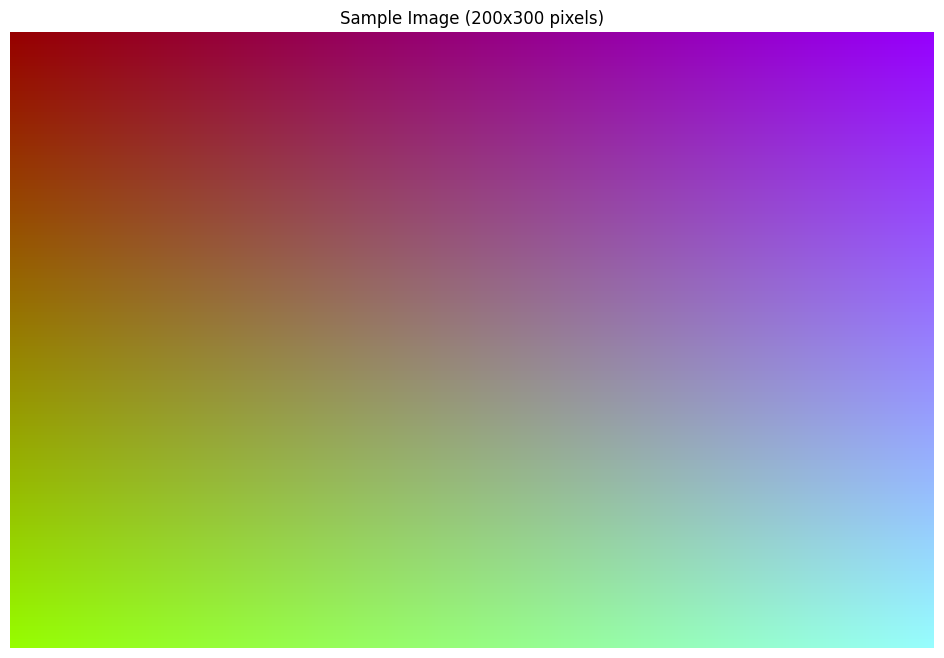

Image created: (200, 300, 3)


In [2]:
# Create a sample image for practice
# Create a 200x300 color image with a gradient
sample_img = np.zeros((200, 300, 3), dtype=np.uint8)

# Create colorful gradient
for i in range(200):
    for j in range(300):
        sample_img[i, j] = [int(j / 300 * 255), int(i / 200 * 255), 150]

# Display the image
plt.imshow(cv.cvtColor(sample_img, cv.COLOR_BGR2RGB))
plt.title("Sample Image (200x300 pixels)")
plt.axis("off")
plt.show()

print(f"Image created: {sample_img.shape}")

### Accessing Individual Pixels

In [3]:
# Access a pixel at row=100, col=150
pixel = sample_img[100, 150]
print(f"Pixel at (100, 150): {pixel}")
print(f"  Blue channel:  {pixel[0]}")
print(f"  Green channel: {pixel[1]}")
print(f"  Red channel:   {pixel[2]}")

# Access just one channel
blue_value = sample_img[100, 150, 0]
print(f"\nBlue value only: {blue_value}")

# Access multiple pixels (a region)
region = sample_img[50:60, 100:110]  # 10x10 pixel region
print(f"\nRegion shape: {region.shape}")
print(f"Region is a {region.shape[0]}x{region.shape[1]} area with {region.shape[2]} channels")

Pixel at (100, 150): [127 127 150]
  Blue channel:  127
  Green channel: 127
  Red channel:   150

Blue value only: 127

Region shape: (10, 10, 3)
Region is a 10x10 area with 3 channels


### Modifying Pixel Values

You can change pixel values by assigning new values:

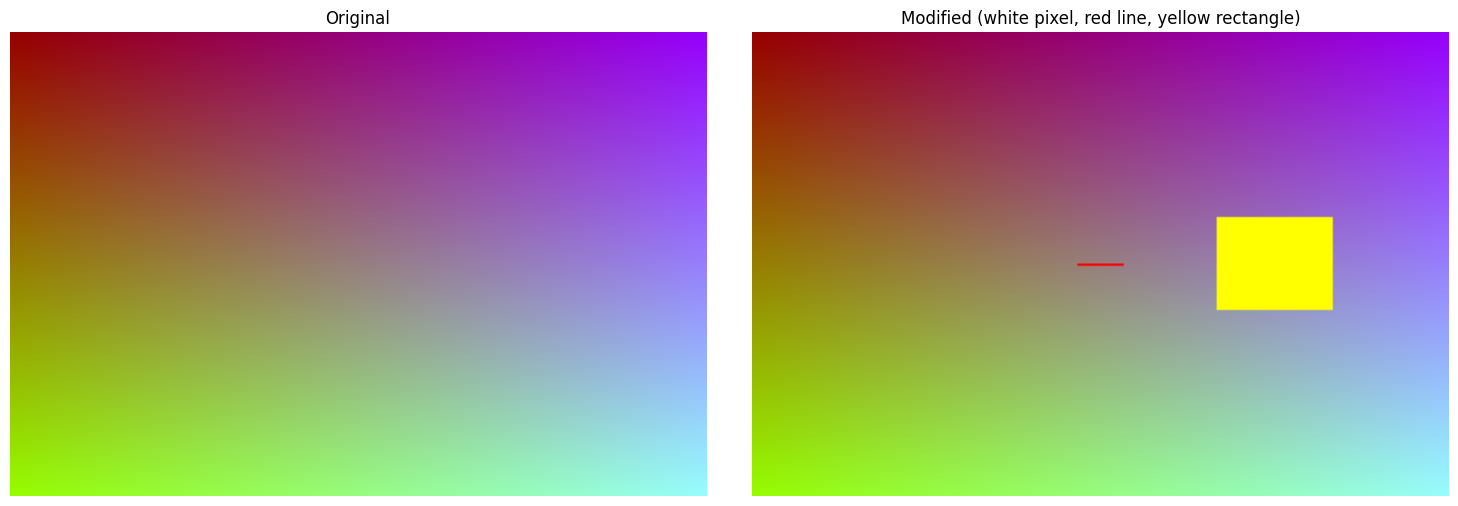

In [4]:
# Make a copy to modify
modified_img = sample_img.copy()

# Change a single pixel to white
modified_img[100, 150] = [255, 255, 255]

# Change a line of pixels to red
modified_img[100, 140:160] = [0, 0, 255]

# Change a rectangular region to yellow
modified_img[80:120, 200:250] = [0, 255, 255]

# Display comparison
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(sample_img, cv.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(modified_img, cv.COLOR_BGR2RGB))
plt.title("Modified (white pixel, red line, yellow rectangle)")
plt.axis("off")

plt.tight_layout()
plt.show()

---

## Part 2: Image Properties

Understanding image properties is crucial for image processing. Let's explore the key properties:

In [5]:
# Get image properties
print("=== IMAGE PROPERTIES ===")
print(f"\n1. Shape: {sample_img.shape}")
print(f"   - Height (rows): {sample_img.shape[0]} pixels")
print(f"   - Width (cols):  {sample_img.shape[1]} pixels")
print(f"   - Channels:      {sample_img.shape[2]} (B, G, R)")

print(f"\n2. Size: {sample_img.size}")
print(f"   - Total elements: {sample_img.size}")
print(
    f"   - Calculation: {sample_img.shape[0]} × {sample_img.shape[1]} × {sample_img.shape[2]} = {sample_img.size}"
)

print(f"\n3. Data Type: {sample_img.dtype}")
print(f"   - uint8 means: unsigned 8-bit integer (0-255)")

print(f"\n4. Memory Usage:")
print(f"   - {sample_img.nbytes:,} bytes ({sample_img.nbytes / 1024:.2f} KB)")

print(f"\n5. Dimensions: {sample_img.ndim}")
print(f"   - 3D array (height, width, channels)")

=== IMAGE PROPERTIES ===

1. Shape: (200, 300, 3)
   - Height (rows): 200 pixels
   - Width (cols):  300 pixels
   - Channels:      3 (B, G, R)

2. Size: 180000
   - Total elements: 180000
   - Calculation: 200 × 300 × 3 = 180000

3. Data Type: uint8
   - uint8 means: unsigned 8-bit integer (0-255)

4. Memory Usage:
   - 180,000 bytes (175.78 KB)

5. Dimensions: 3
   - 3D array (height, width, channels)


### Comparing Grayscale and Color Images

COLOR IMAGE:
  Shape: (200, 300, 3)
  Size:  180000 elements
  Memory: 180,000 bytes

GRAYSCALE IMAGE:
  Shape: (200, 300)
  Size:  60000 elements
  Memory: 60,000 bytes

Memory saved by using grayscale: 66.7%


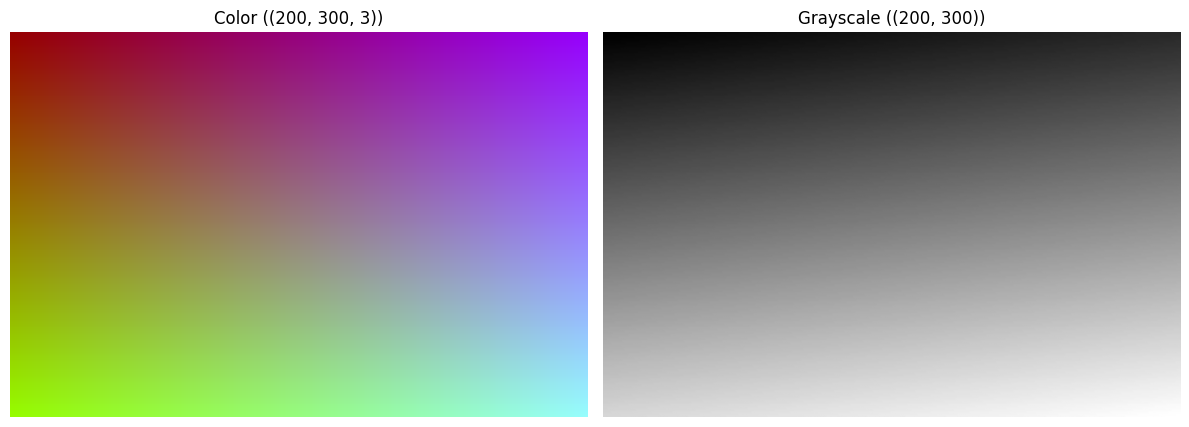

In [6]:
# Convert to grayscale
gray_img = cv.cvtColor(sample_img, cv.COLOR_BGR2GRAY)

print("COLOR IMAGE:")
print(f"  Shape: {sample_img.shape}")
print(f"  Size:  {sample_img.size} elements")
print(f"  Memory: {sample_img.nbytes:,} bytes")

print("\nGRAYSCALE IMAGE:")
print(f"  Shape: {gray_img.shape}")
print(f"  Size:  {gray_img.size} elements")
print(f"  Memory: {gray_img.nbytes:,} bytes")

memory_saved = (1 - gray_img.nbytes / sample_img.nbytes) * 100
print(f"\nMemory saved by using grayscale: {memory_saved:.1f}%")

# Visual comparison
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(sample_img, cv.COLOR_BGR2RGB))
plt.title(f"Color ({sample_img.shape})")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(gray_img, cmap="gray")
plt.title(f"Grayscale ({gray_img.shape})")
plt.axis("off")

plt.tight_layout()
plt.show()

---

## Part 3: Region of Interest (ROI)

### What is ROI?

**Region of Interest (ROI)** is a selected portion of an image that you want to work with. It's useful for:
- Processing only specific parts of an image
- Copying/pasting image regions
- Applying effects to specific areas
- Face detection, object tracking, etc.

### Selecting ROI

Syntax: `roi = img[y1:y2, x1:x2]`

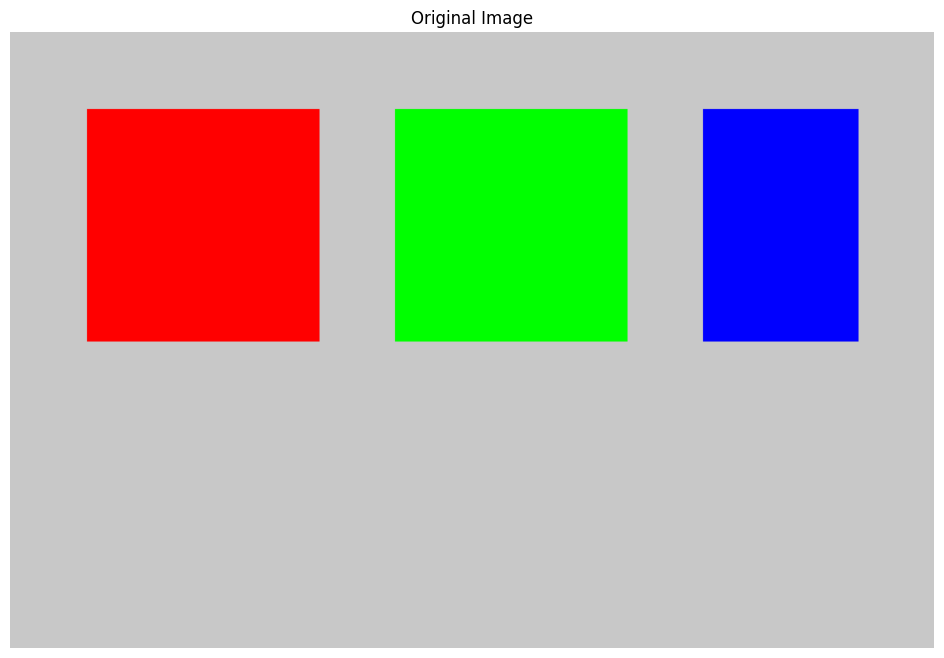

Image shape: (400, 600, 3)


In [7]:
# Create a test image with distinct regions
test_img = np.zeros((400, 600, 3), dtype=np.uint8)
test_img[:] = [200, 200, 200]  # Gray background

# Add colored rectangles
cv.rectangle(test_img, (50, 50), (200, 200), (0, 0, 255), -1)  # Red square
cv.rectangle(test_img, (250, 50), (400, 200), (0, 255, 0), -1)  # Green square
cv.rectangle(test_img, (450, 50), (550, 200), (255, 0, 0), -1)  # Blue square

# Display original
plt.imshow(cv.cvtColor(test_img, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")
plt.show()

print(f"Image shape: {test_img.shape}")

### Extracting ROI

ROI shape: (150, 150, 3)
ROI size: 150x150 pixels


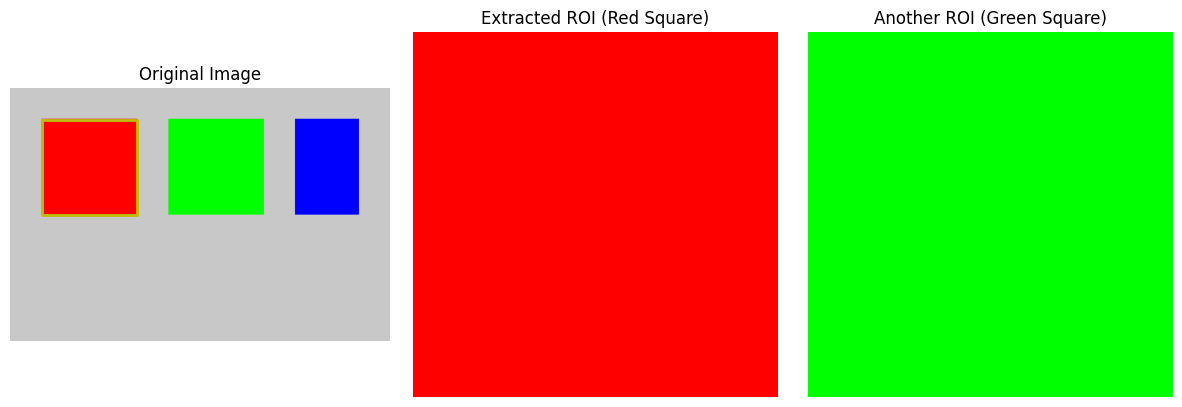

In [8]:
# Select the red square region
roi_red = test_img[50:200, 50:200]

print(f"ROI shape: {roi_red.shape}")
print(f"ROI size: {roi_red.shape[0]}x{roi_red.shape[1]} pixels")

# Display the ROI
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(test_img, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.plot([50, 200, 200, 50, 50], [50, 50, 200, 200, 50], "y-", linewidth=2)
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(roi_red, cv.COLOR_BGR2RGB))
plt.title("Extracted ROI (Red Square)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(test_img[50:200, 250:400], cv.COLOR_BGR2RGB))
plt.title("Another ROI (Green Square)")
plt.axis("off")

plt.tight_layout()
plt.show()

### Copying and Pasting ROI

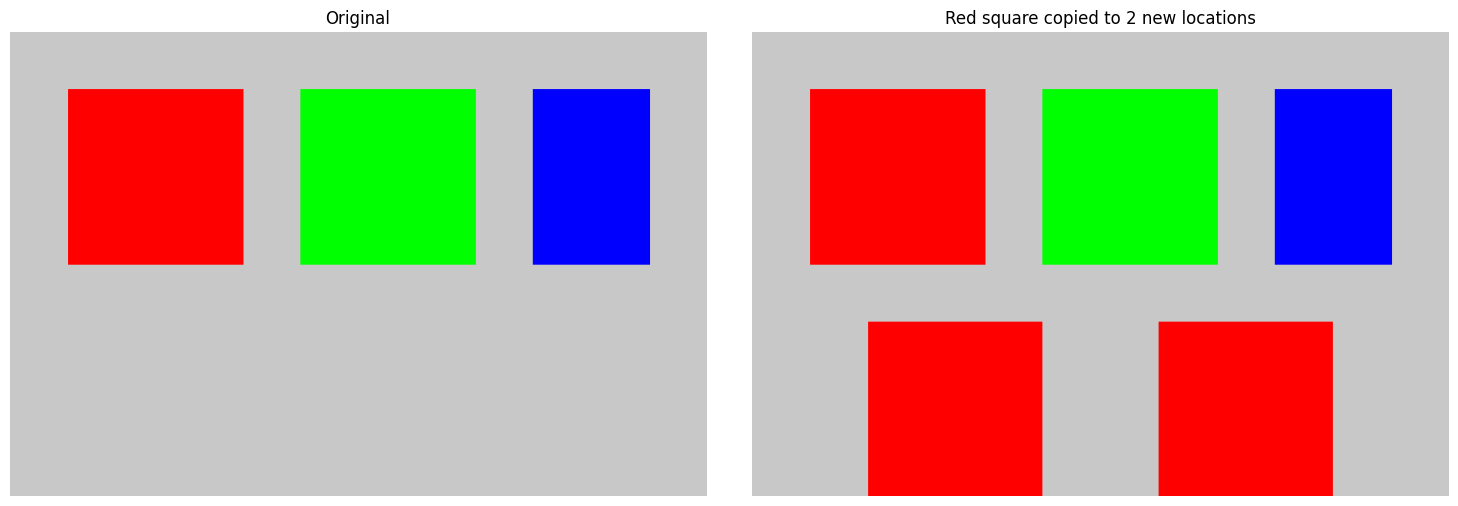

In [9]:
# Copy ROI and paste it elsewhere
copied_img = test_img.copy()

# Extract red square
red_square = test_img[50:200, 50:200]

# Paste it at different locations
copied_img[250:400, 100:250] = red_square
copied_img[250:400, 350:500] = red_square

# Display
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(test_img, cv.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(copied_img, cv.COLOR_BGR2RGB))
plt.title("Red square copied to 2 new locations")
plt.axis("off")

plt.tight_layout()
plt.show()

### Modifying ROI

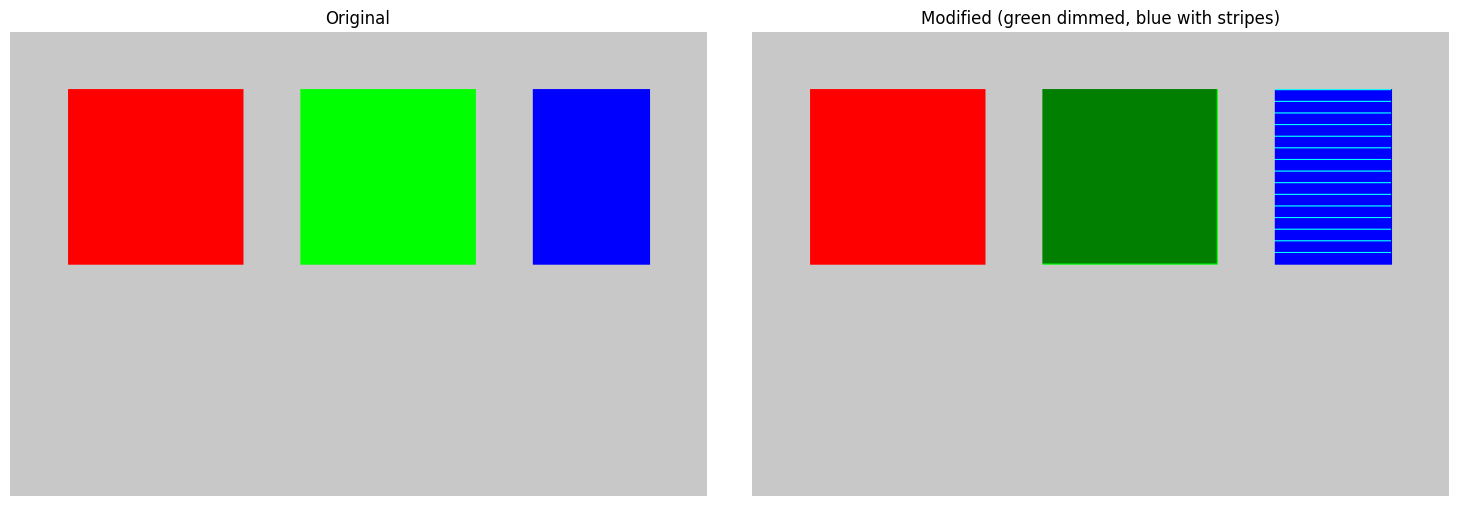

In [10]:
# Modify ROI in-place
modified_roi = test_img.copy()

# Select green square and modify it
roi_green = modified_roi[50:200, 250:400]

# Make it half as bright
roi_green[:, :] = roi_green // 2

# Add a pattern to blue square
modified_roi[50:200:10, 450:550] = [255, 255, 0]  # Cyan stripes

# Display
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(test_img, cv.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(modified_roi, cv.COLOR_BGR2RGB))
plt.title("Modified (green dimmed, blue with stripes)")
plt.axis("off")

plt.tight_layout()
plt.show()

---

## Part 4: Region of Non-Interest (RONI) - Masking

### What is RONI?

**Region of Non-Interest (RONI)** is the opposite of ROI - it's the area you want to **ignore or hide**. We use **masks** to achieve this.

A **mask** is a binary image (black and white) where:
- **White (255)** = show this pixel
- **Black (0)** = hide this pixel

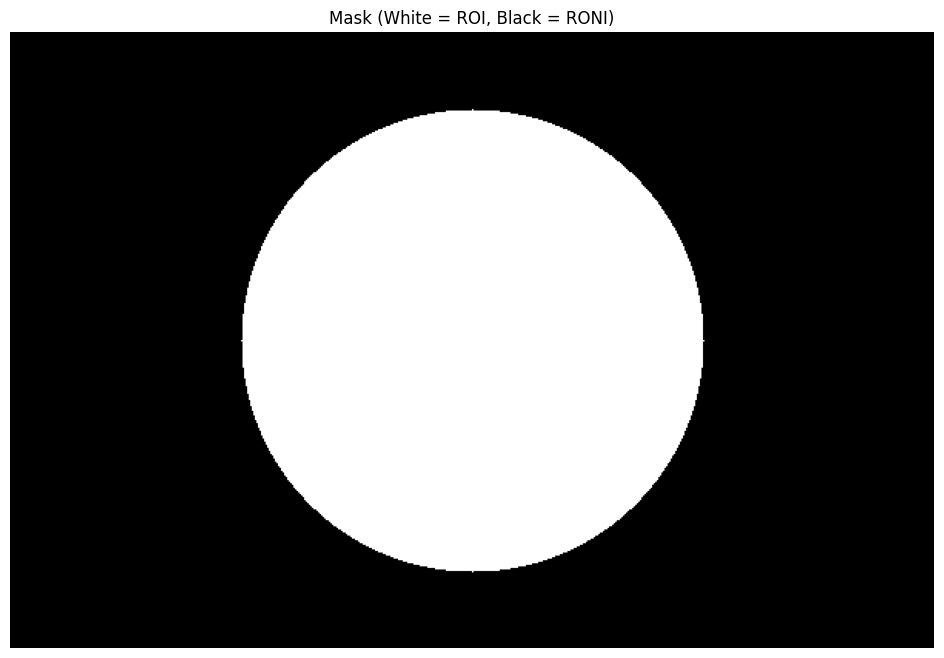

Mask shape: (400, 600)
Mask dtype: uint8


In [11]:
# Create a circular mask
mask = np.zeros((400, 600), dtype=np.uint8)

# Draw a white circle (this will be our ROI)
cv.circle(mask, (300, 200), 150, 255, -1)

# Display the mask
plt.imshow(mask, cmap="gray")
plt.title("Mask (White = ROI, Black = RONI)")
plt.axis("off")
plt.show()

print(f"Mask shape: {mask.shape}")
print(f"Mask dtype: {mask.dtype}")

### Applying Masks

Use `cv.bitwise_and()` to apply a mask:

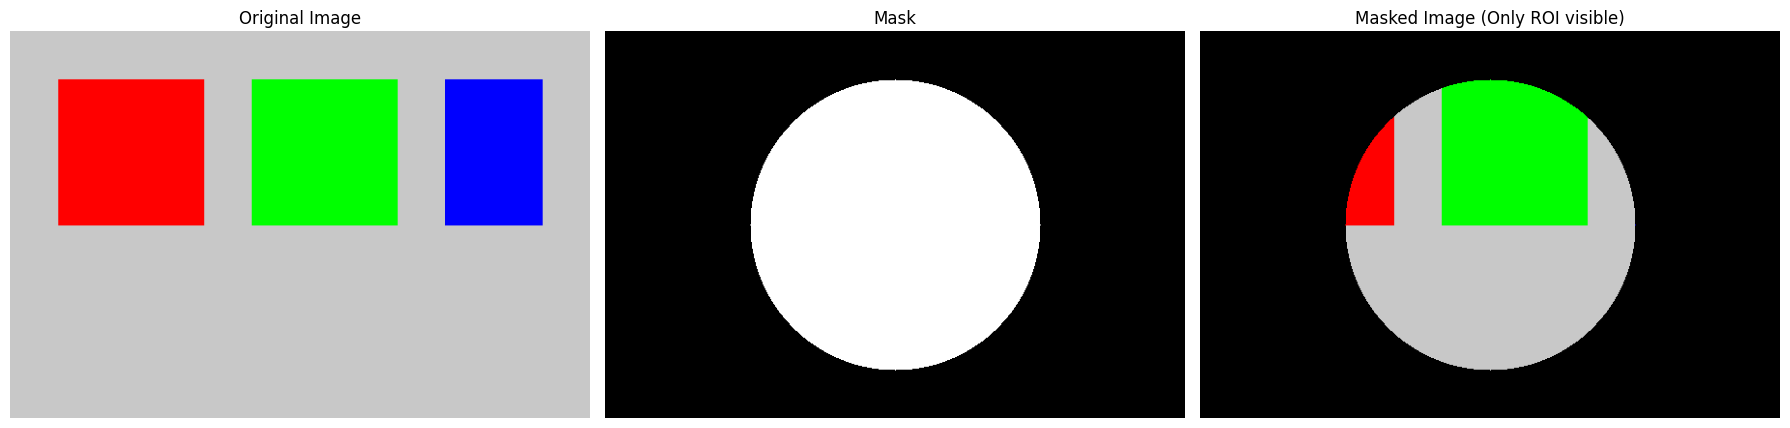

In [12]:
# Apply mask to image
masked_img = cv.bitwise_and(test_img, test_img, mask=mask)

# Display
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(test_img, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(mask, cmap="gray")
plt.title("Mask")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(masked_img, cv.COLOR_BGR2RGB))
plt.title("Masked Image (Only ROI visible)")
plt.axis("off")

plt.tight_layout()
plt.show()

### Inverse Mask (Show RONI, Hide ROI)

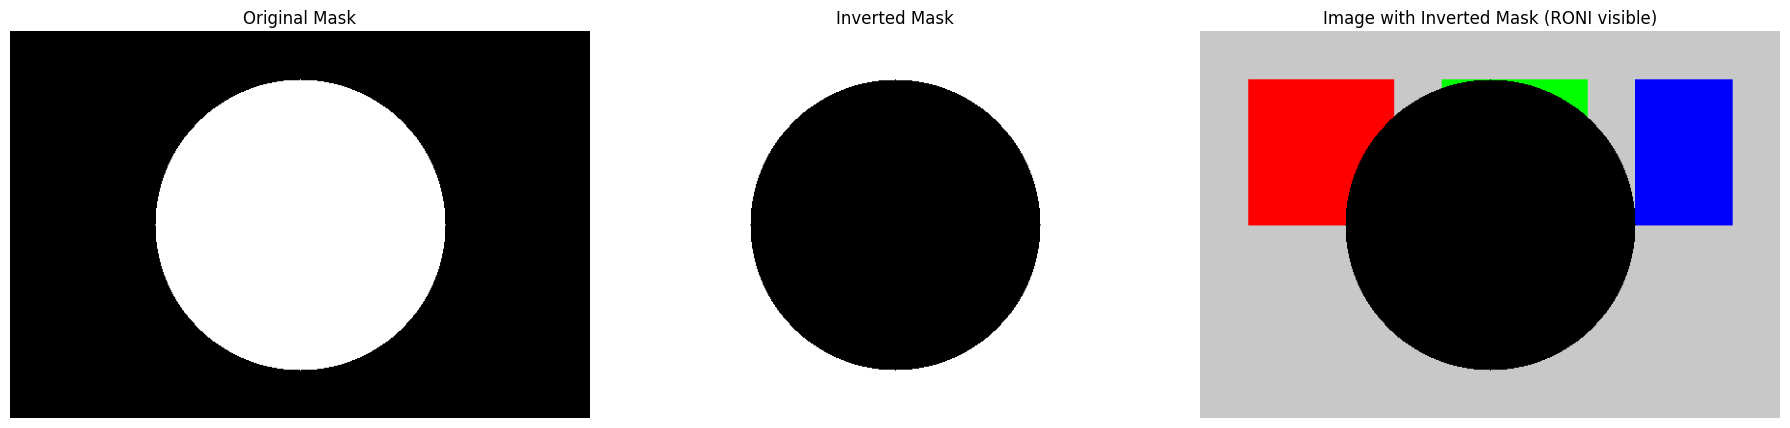

In [13]:
# Invert the mask
mask_inv = cv.bitwise_not(mask)

# Apply inverted mask
masked_inv_img = cv.bitwise_and(test_img, test_img, mask=mask_inv)

# Display
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.imshow(mask, cmap="gray")
plt.title("Original Mask")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(mask_inv, cmap="gray")
plt.title("Inverted Mask")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(masked_inv_img, cv.COLOR_BGR2RGB))
plt.title("Image with Inverted Mask (RONI visible)")
plt.axis("off")

plt.tight_layout()
plt.show()

---

## Part 5: Splitting and Merging Color Channels

### Understanding Color Channels

A color image has 3 channels:
- **Blue** (index 0)
- **Green** (index 1)
- **Red** (index 2)

We can split these apart and work with them individually.

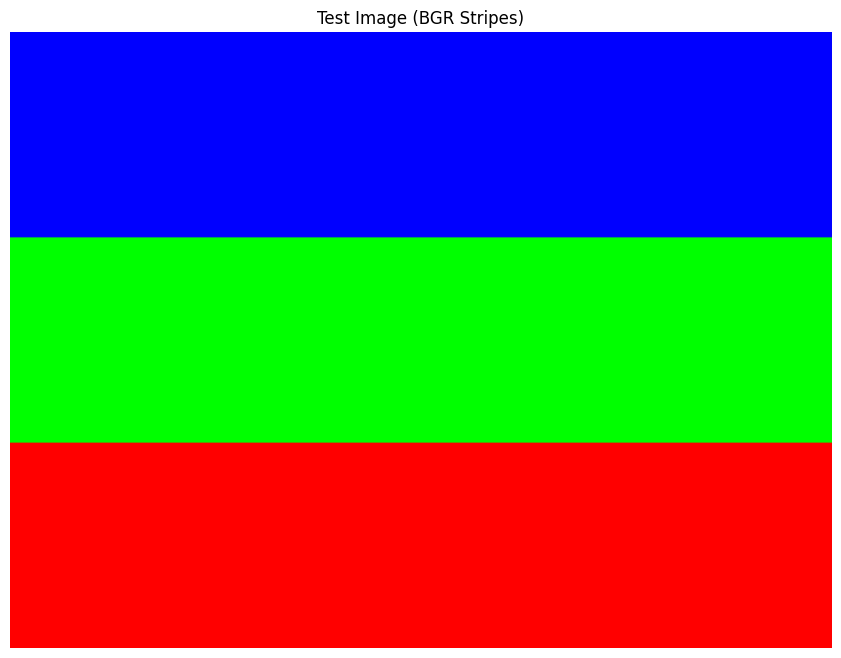

In [14]:
# Create a colorful test image
color_img = np.zeros((300, 400, 3), dtype=np.uint8)
color_img[0:100, :] = [255, 0, 0]  # Blue top
color_img[100:200, :] = [0, 255, 0]  # Green middle
color_img[200:300, :] = [0, 0, 255]  # Red bottom

plt.imshow(cv.cvtColor(color_img, cv.COLOR_BGR2RGB))
plt.title("Test Image (BGR Stripes)")
plt.axis("off")
plt.show()

### Splitting Channels

Original image shape: (300, 400, 3)
Blue channel shape: (300, 400)
Green channel shape: (300, 400)
Red channel shape: (300, 400)


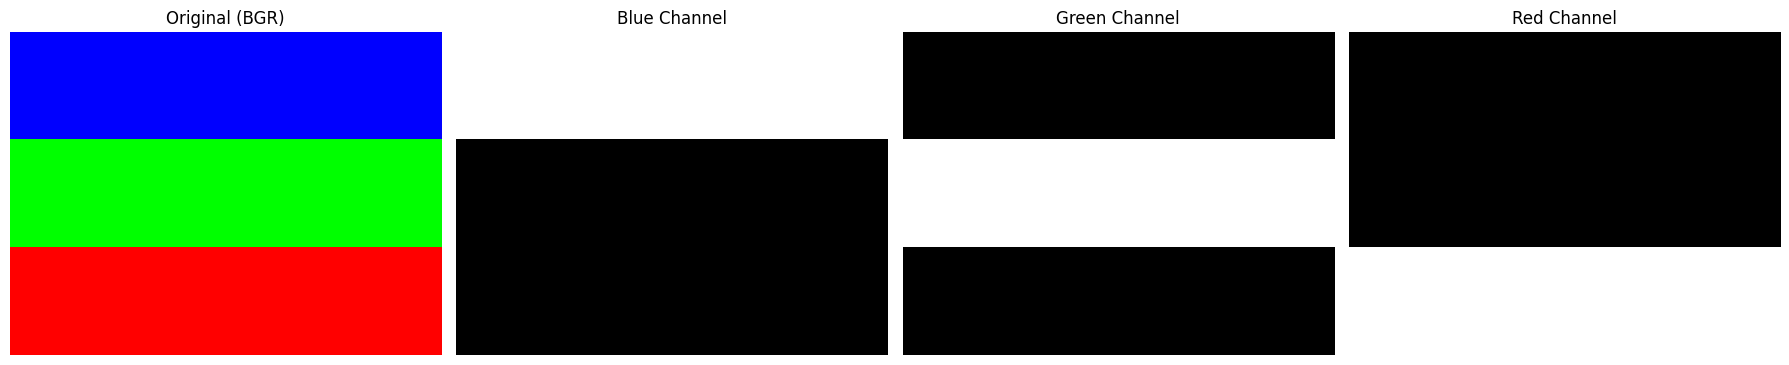

In [15]:
# Split into B, G, R channels
b, g, r = cv.split(color_img)

print(f"Original image shape: {color_img.shape}")
print(f"Blue channel shape: {b.shape}")
print(f"Green channel shape: {g.shape}")
print(f"Red channel shape: {r.shape}")

# Display each channel
plt.figure(figsize=(18, 4))

plt.subplot(1, 4, 1)
plt.imshow(cv.cvtColor(color_img, cv.COLOR_BGR2RGB))
plt.title("Original (BGR)")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(b, cmap="gray")
plt.title("Blue Channel")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(g, cmap="gray")
plt.title("Green Channel")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(r, cmap="gray")
plt.title("Red Channel")
plt.axis("off")

plt.tight_layout()
plt.show()

### Visualizing Channels in Color

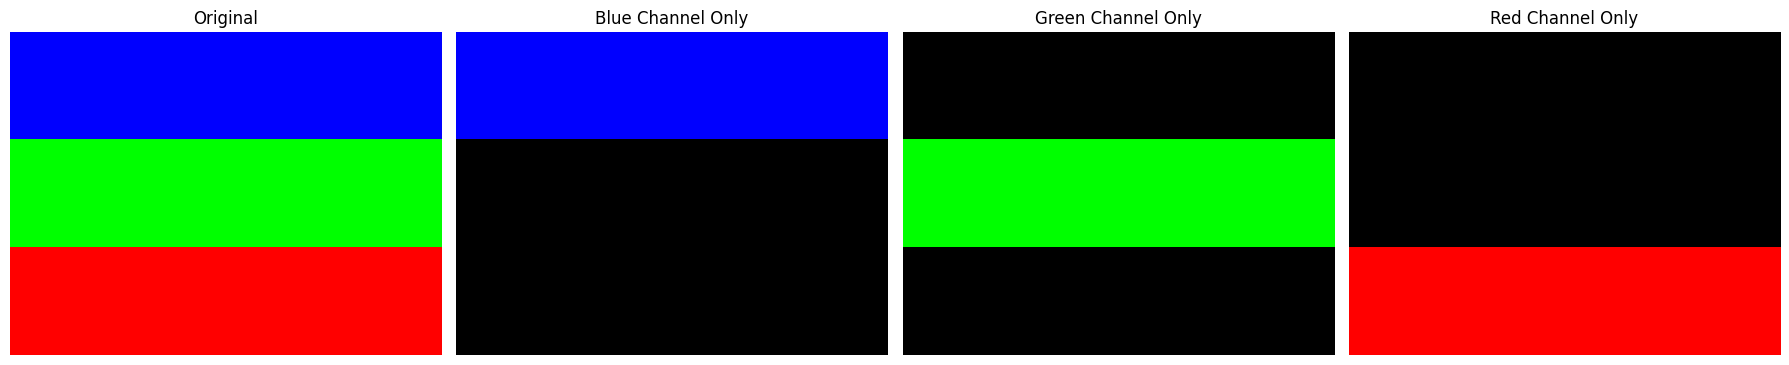

In [16]:
# Create colored versions of each channel
zeros = np.zeros_like(b)

# Blue only
blue_only = cv.merge([b, zeros, zeros])

# Green only
green_only = cv.merge([zeros, g, zeros])

# Red only
red_only = cv.merge([zeros, zeros, r])

# Display
plt.figure(figsize=(18, 4))

plt.subplot(1, 4, 1)
plt.imshow(cv.cvtColor(color_img, cv.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(cv.cvtColor(blue_only, cv.COLOR_BGR2RGB))
plt.title("Blue Channel Only")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(cv.cvtColor(green_only, cv.COLOR_BGR2RGB))
plt.title("Green Channel Only")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(cv.cvtColor(red_only, cv.COLOR_BGR2RGB))
plt.title("Red Channel Only")
plt.axis("off")

plt.tight_layout()
plt.show()

### Merging Channels

You can modify channels and merge them back:

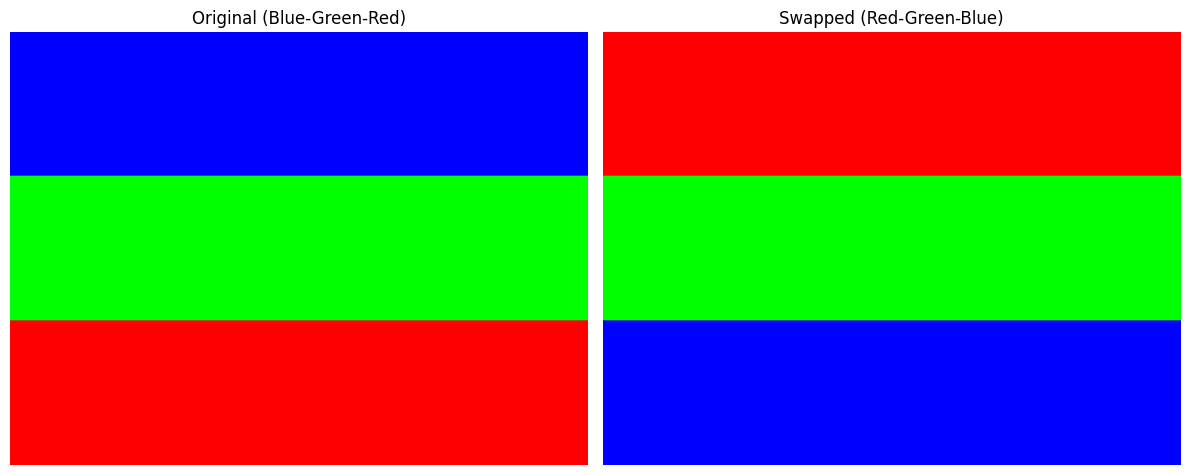

In [17]:
# Swap red and blue channels
swapped_img = cv.merge([r, g, b])  # R, G, B instead of B, G, R

# Display
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(color_img, cv.COLOR_BGR2RGB))
plt.title("Original (Blue-Green-Red)")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(swapped_img, cv.COLOR_BGR2RGB))
plt.title("Swapped (Red-Green-Blue)")
plt.axis("off")

plt.tight_layout()
plt.show()

---

## Part 6: Adding Borders (Padding)

### Why Add Borders?

- Prepare images for processing (e.g., convolution)
- Create decorative frames
- Adjust image size
- Avoid edge artifacts

### Border Types

OpenCV provides several border types:
- `BORDER_CONSTANT` - Constant color border
- `BORDER_REFLECT` - Reflect border (dcba|abcd|dcba)
- `BORDER_REPLICATE` - Replicate edge pixels (aaaa|abcd|dddd)
- `BORDER_WRAP` - Wrap around (abcd|abcd|abcd)

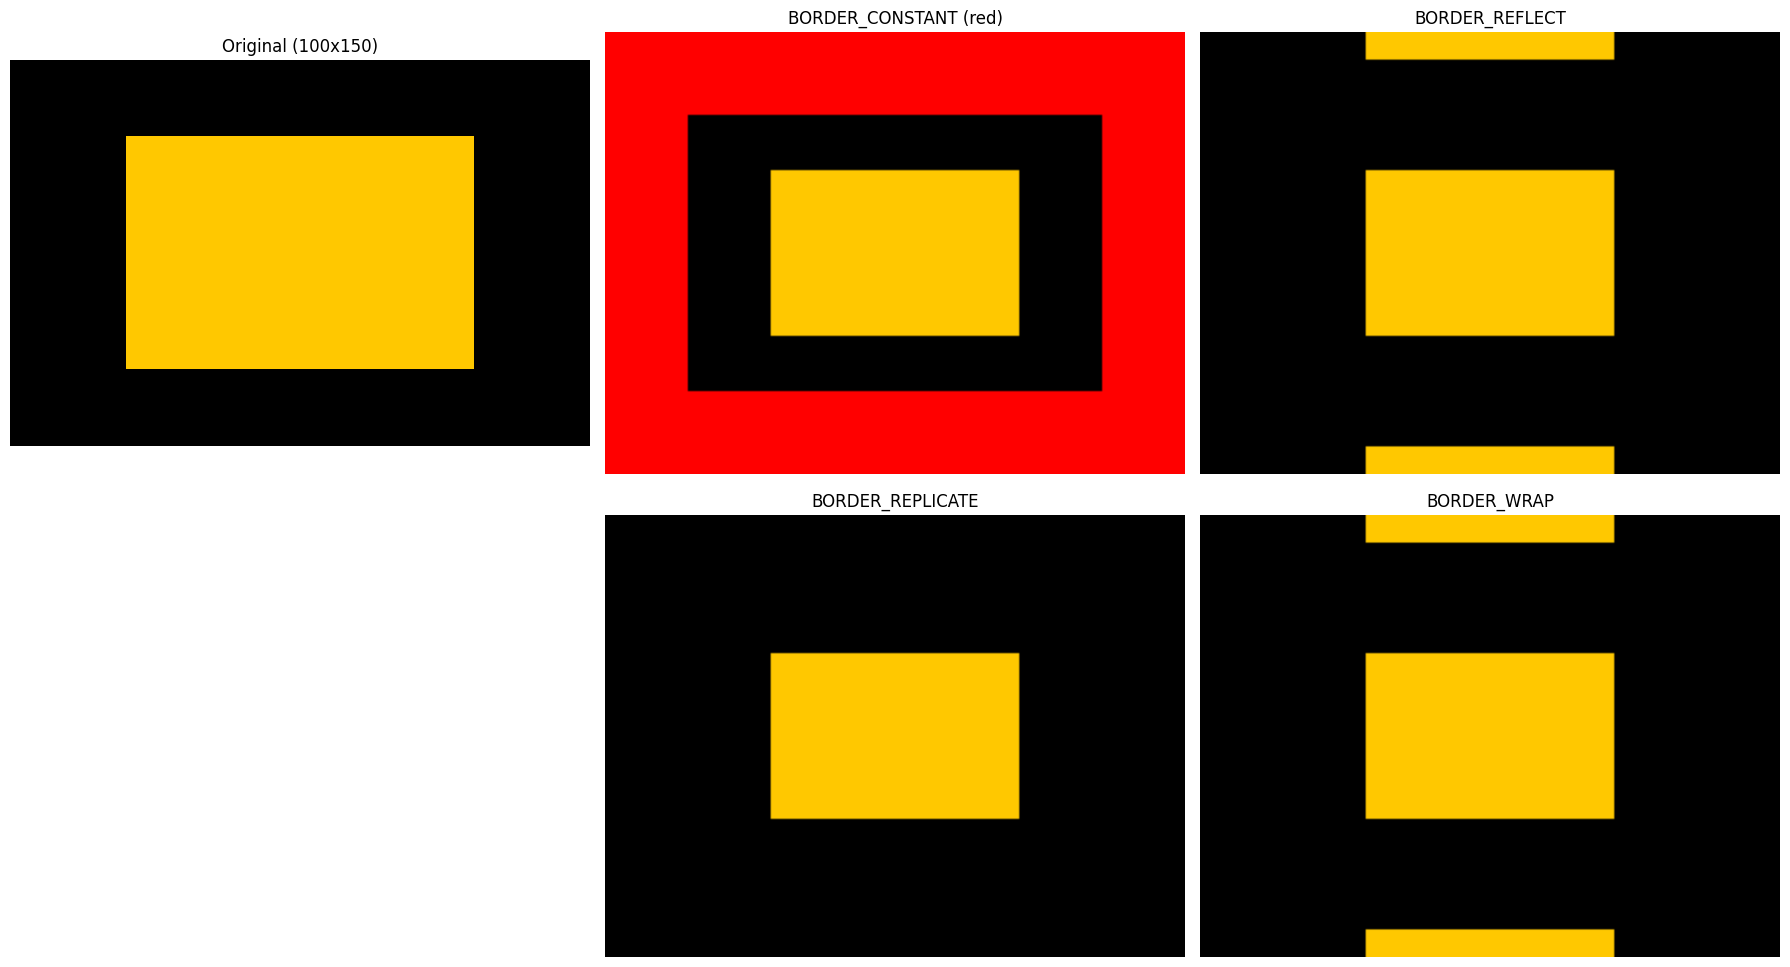

Original size: (100, 150, 3)
With border: (160, 210, 3)


In [18]:
# Create a small test image
small_img = np.zeros((100, 150, 3), dtype=np.uint8)
small_img[20:80, 30:120] = [0, 200, 255]  # Yellow rectangle

# Add different types of borders
border_size = 30

# Constant border (red)
constant = cv.copyMakeBorder(
    small_img,
    border_size,
    border_size,
    border_size,
    border_size,
    cv.BORDER_CONSTANT,
    value=[0, 0, 255],
)

# Reflect border
reflect = cv.copyMakeBorder(
    small_img, border_size, border_size, border_size, border_size, cv.BORDER_REFLECT
)

# Replicate border
replicate = cv.copyMakeBorder(
    small_img, border_size, border_size, border_size, border_size, cv.BORDER_REPLICATE
)

# Wrap border
wrap = cv.copyMakeBorder(
    small_img, border_size, border_size, border_size, border_size, cv.BORDER_WRAP
)

# Display all
plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
plt.imshow(cv.cvtColor(small_img, cv.COLOR_BGR2RGB))
plt.title("Original (100x150)")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(cv.cvtColor(constant, cv.COLOR_BGR2RGB))
plt.title("BORDER_CONSTANT (red)")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.imshow(cv.cvtColor(reflect, cv.COLOR_BGR2RGB))
plt.title("BORDER_REFLECT")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(cv.cvtColor(replicate, cv.COLOR_BGR2RGB))
plt.title("BORDER_REPLICATE")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(cv.cvtColor(wrap, cv.COLOR_BGR2RGB))
plt.title("BORDER_WRAP")
plt.axis("off")

plt.tight_layout()
plt.show()

print(f"Original size: {small_img.shape}")
print(f"With border: {constant.shape}")

---

## Part 7: Image Arithmetic Operations

### Image Addition

**Two ways to add images**:
1. **NumPy addition**: `img1 + img2` (can overflow/wrap around)
2. **OpenCV addition**: `cv.add(img1, img2)` (saturates at 255)

**Important**: OpenCV's `cv.add()` is safer!

Adding 200 + 100:
  NumPy addition: [[44]]  (wraps around: 300 mod 256 = 44)
  OpenCV addition: [[255]]  (saturates at 255)


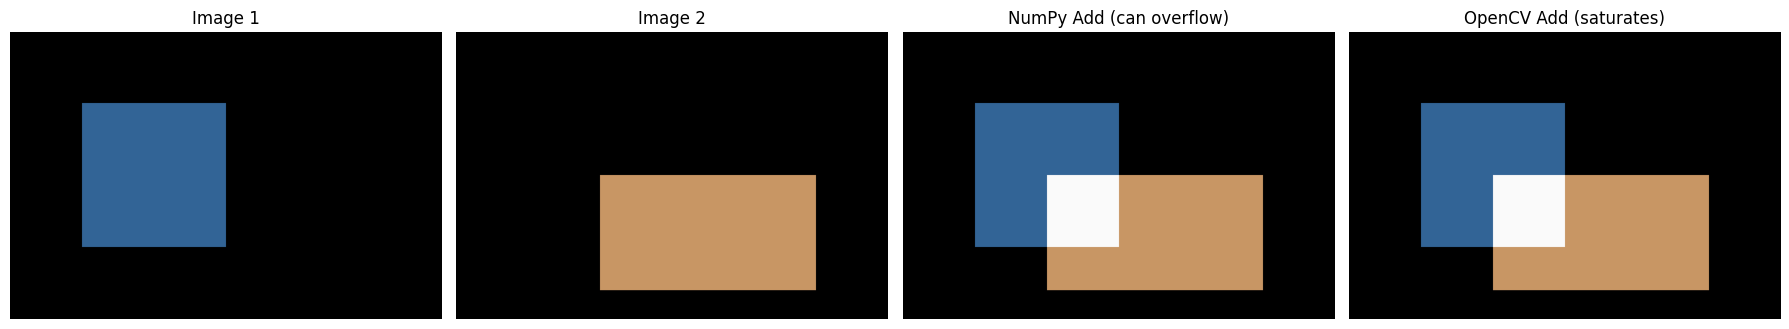

In [19]:
# Demonstrate overflow vs saturation
x = np.array([[200]], dtype=np.uint8)
y = np.array([[100]], dtype=np.uint8)

print("Adding 200 + 100:")
print(f"  NumPy addition: {x + y}  (wraps around: 300 mod 256 = 44)")
print(f"  OpenCV addition: {cv.add(x, y)}  (saturates at 255)")

# Create two images to add
img1 = np.zeros((200, 300, 3), dtype=np.uint8)
img1[50:150, 50:150] = [150, 100, 50]

img2 = np.zeros((200, 300, 3), dtype=np.uint8)
img2[100:180, 100:250] = [100, 150, 200]

# Add them
numpy_add = img1 + img2
opencv_add = cv.add(img1, img2)

# Display
plt.figure(figsize=(18, 5))

plt.subplot(1, 4, 1)
plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
plt.title("Image 1")
plt.axis("off")

plt.subplot(1, 4, 2)
plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
plt.title("Image 2")
plt.axis("off")

plt.subplot(1, 4, 3)
plt.imshow(cv.cvtColor(numpy_add, cv.COLOR_BGR2RGB))
plt.title("NumPy Add (can overflow)")
plt.axis("off")

plt.subplot(1, 4, 4)
plt.imshow(cv.cvtColor(opencv_add, cv.COLOR_BGR2RGB))
plt.title("OpenCV Add (saturates)")
plt.axis("off")

plt.tight_layout()
plt.show()

### Image Blending

**Blending** combines two images with different weights:

`result = α × img1 + β × img2 + γ`

Where:
- `α` (alpha) = weight for first image
- `β` (beta) = weight for second image
- `γ` (gamma) = scalar added to result

Common: `α + β = 1.0` for proper blending

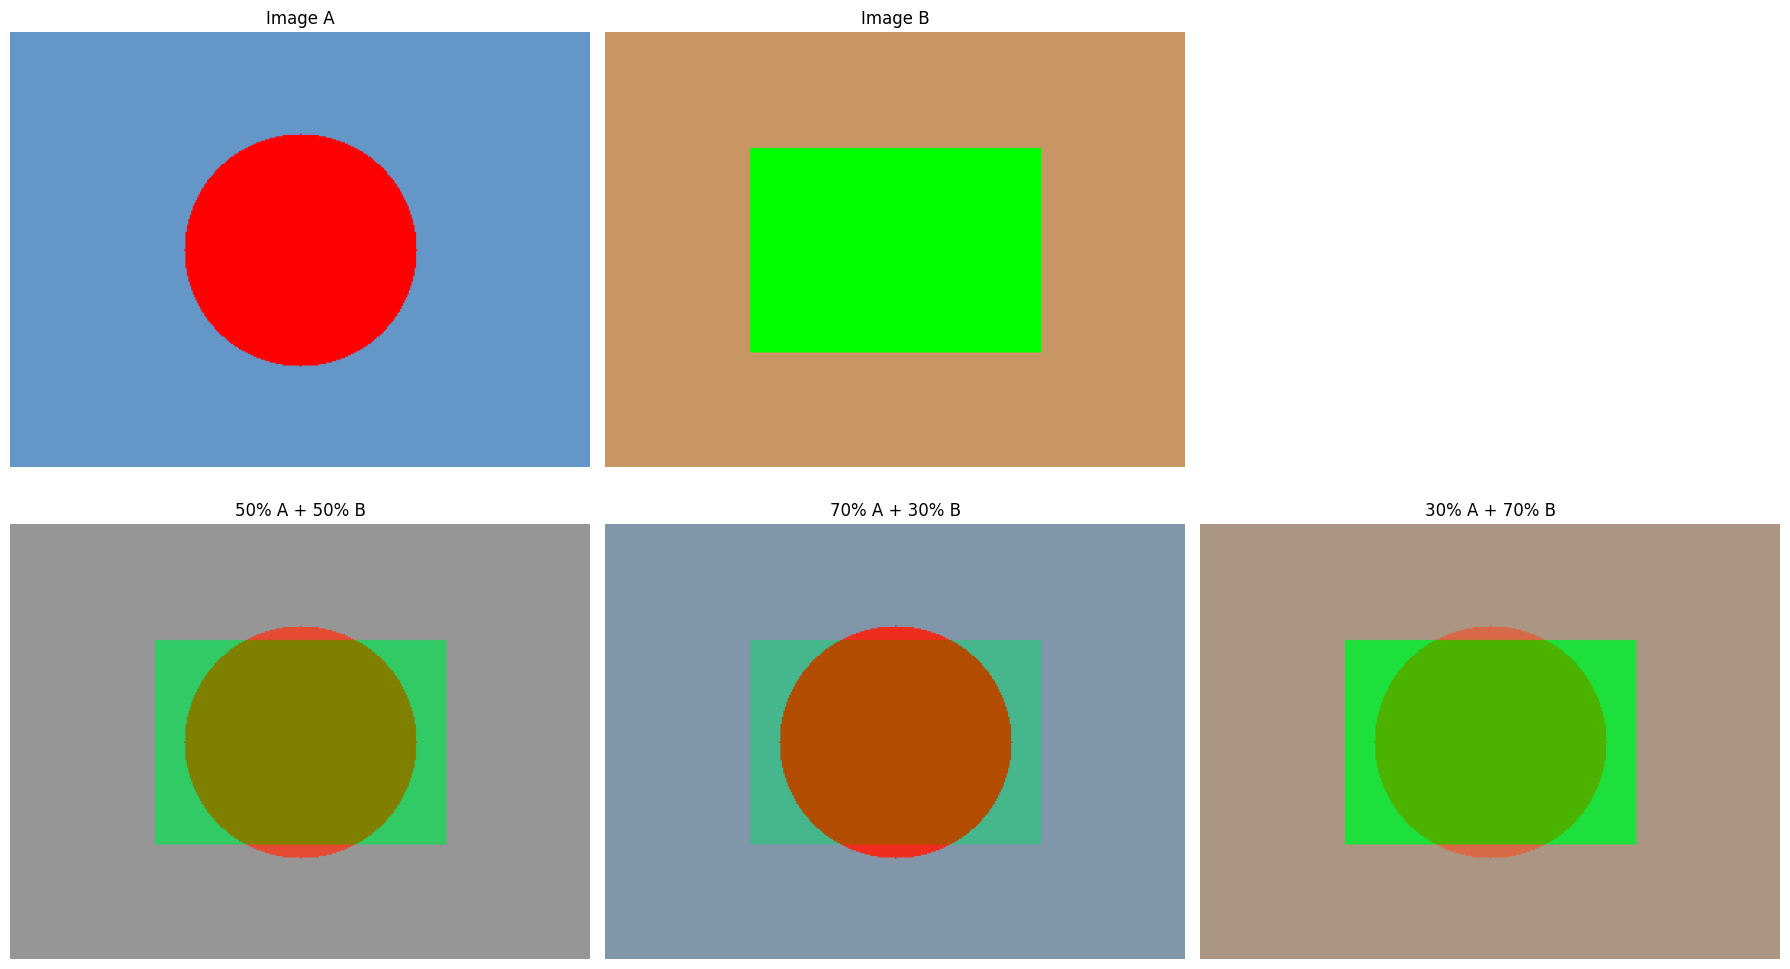

In [20]:
# Create two different images
img_a = np.zeros((300, 400, 3), dtype=np.uint8)
img_a[:] = [200, 150, 100]  # Orange background
cv.circle(img_a, (200, 150), 80, (0, 0, 255), -1)  # Red circle

img_b = np.zeros((300, 400, 3), dtype=np.uint8)
img_b[:] = [100, 150, 200]  # Blue background
cv.rectangle(img_b, (100, 80), (300, 220), (0, 255, 0), -1)  # Green rectangle

# Blend with different weights
blend_50_50 = cv.addWeighted(img_a, 0.5, img_b, 0.5, 0)
blend_70_30 = cv.addWeighted(img_a, 0.7, img_b, 0.3, 0)
blend_30_70 = cv.addWeighted(img_a, 0.3, img_b, 0.7, 0)

# Display
plt.figure(figsize=(18, 10))

plt.subplot(2, 3, 1)
plt.imshow(cv.cvtColor(img_a, cv.COLOR_BGR2RGB))
plt.title("Image A")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.imshow(cv.cvtColor(img_b, cv.COLOR_BGR2RGB))
plt.title("Image B")
plt.axis("off")

plt.subplot(2, 3, 4)
plt.imshow(cv.cvtColor(blend_50_50, cv.COLOR_BGR2RGB))
plt.title("50% A + 50% B")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.imshow(cv.cvtColor(blend_70_30, cv.COLOR_BGR2RGB))
plt.title("70% A + 30% B")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.imshow(cv.cvtColor(blend_30_70, cv.COLOR_BGR2RGB))
plt.title("30% A + 70% B")
plt.axis("off")

plt.tight_layout()
plt.show()

---

## Part 8: Practical Exercises

### Exercise 1: Face Blurring

Extract a face region and blur it for privacy.

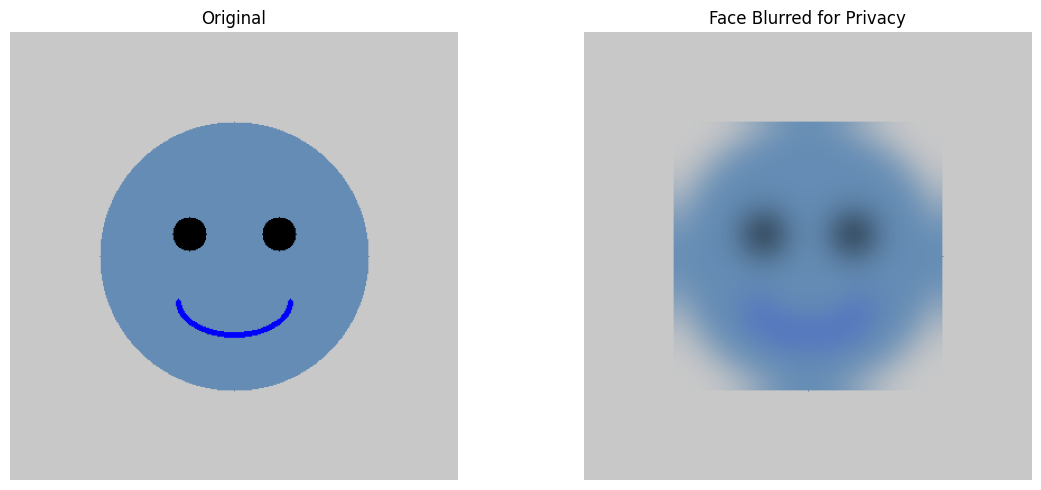

In [21]:
# Create a face-like image
face_img = np.ones((400, 400, 3), dtype=np.uint8) * 200

# Draw a simple face
cv.circle(face_img, (200, 200), 120, (180, 140, 100), -1)  # Face
cv.circle(face_img, (160, 180), 15, (0, 0, 0), -1)  # Left eye
cv.circle(face_img, (240, 180), 15, (0, 0, 0), -1)  # Right eye
cv.ellipse(face_img, (200, 240), (50, 30), 0, 0, 180, (255, 0, 0), 3)  # Smile

# TODO: Extract the face region (ROI)
# Hint: Face is approximately from (80,80) to (320,320)
face_roi = face_img[80:320, 80:320]

# TODO: Blur the face
# Hint: Use cv.GaussianBlur(roi, (kernel_size, kernel_size), 0)
blurred_face = cv.GaussianBlur(face_roi, (99, 99), 0)

# Create output image
output = face_img.copy()
output[80:320, 80:320] = blurred_face

# Display
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(face_img, cv.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(output, cv.COLOR_BGR2RGB))
plt.title("Face Blurred for Privacy")
plt.axis("off")

plt.tight_layout()
plt.show()

### Exercise 2: Channel Swapping for Artistic Effect

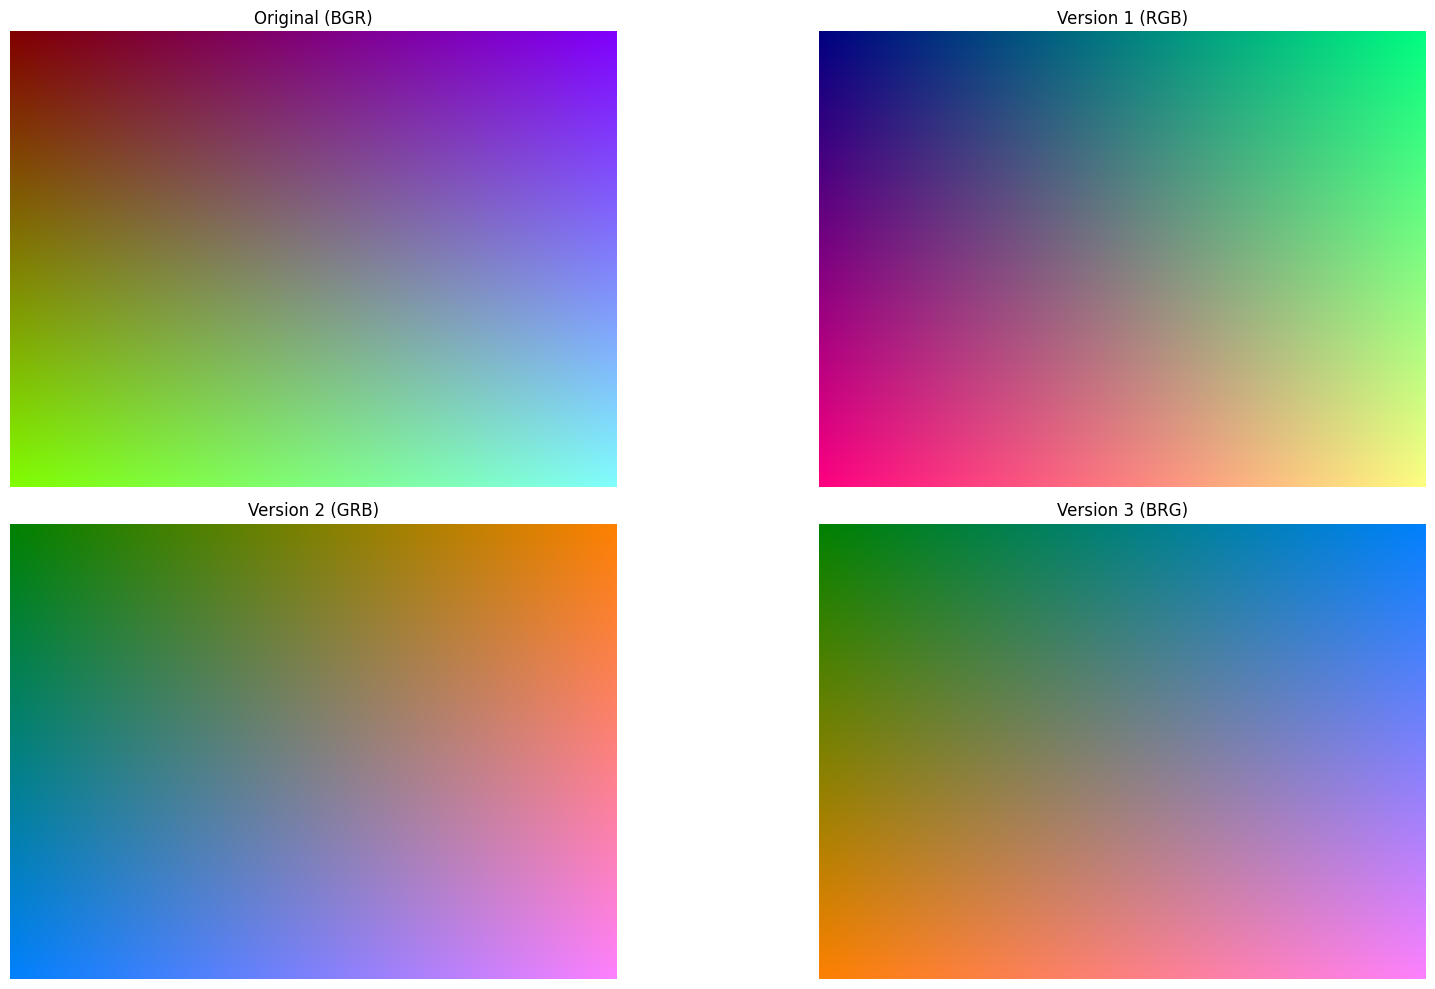

In [22]:
# Create a colorful test image
artistic_img = np.zeros((300, 400, 3), dtype=np.uint8)
for i in range(300):
    for j in range(400):
        artistic_img[i, j] = [int(j / 400 * 255), int(i / 300 * 255), 128]

# TODO: Split into channels
b, g, r = cv.split(artistic_img)

# TODO: Create different channel combinations
# Try: RGB, GBR, RBG, etc.
version1 = cv.merge([r, b, g])  # Change this!
version2 = cv.merge([g, r, b])  # Change this!
version3 = cv.merge([b, r, g])  # Change this!

# Display
plt.figure(figsize=(18, 10))

plt.subplot(2, 2, 1)
plt.imshow(cv.cvtColor(artistic_img, cv.COLOR_BGR2RGB))
plt.title("Original (BGR)")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(cv.cvtColor(version1, cv.COLOR_BGR2RGB))
plt.title("Version 1 (RGB)")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(cv.cvtColor(version2, cv.COLOR_BGR2RGB))
plt.title("Version 2 (GRB)")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(cv.cvtColor(version3, cv.COLOR_BGR2RGB))
plt.title("Version 3 (BRG)")
plt.axis("off")

plt.tight_layout()
plt.show()

### Exercise 3: Simple Watermark

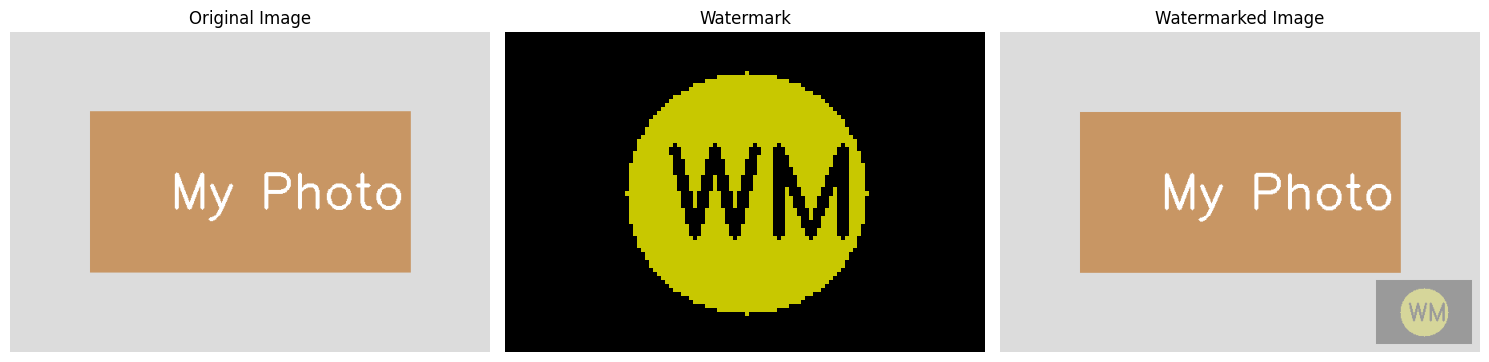

In [23]:
# Create main image
main_image = np.ones((400, 600, 3), dtype=np.uint8) * 220
cv.rectangle(main_image, (100, 100), (500, 300), (100, 150, 200), -1)
cv.putText(main_image, "My Photo", (200, 220), cv.FONT_HERSHEY_SIMPLEX, 2, (255, 255, 255), 3)

# Create watermark (small logo)
watermark = np.zeros((80, 120, 3), dtype=np.uint8)
cv.circle(watermark, (60, 40), 30, (0, 200, 200), -1)
cv.putText(watermark, "WM", (40, 50), cv.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)

# TODO: Blend watermark onto main image
# Hint: Extract ROI where watermark will go, blend it, put it back

# Extract ROI (bottom-right corner)
roi = main_image[310:390, 470:590]

# Blend watermark with ROI (semi-transparent)
blended = cv.addWeighted(roi, 0.7, watermark, 0.3, 0)

# Put blended region back
watermarked = main_image.copy()
watermarked[310:390, 470:590] = blended

# Display
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(main_image, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(watermark, cv.COLOR_BGR2RGB))
plt.title("Watermark")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(watermarked, cv.COLOR_BGR2RGB))
plt.title("Watermarked Image")
plt.axis("off")

plt.tight_layout()
plt.show()

### Exercise 4: Create a Photo Frame

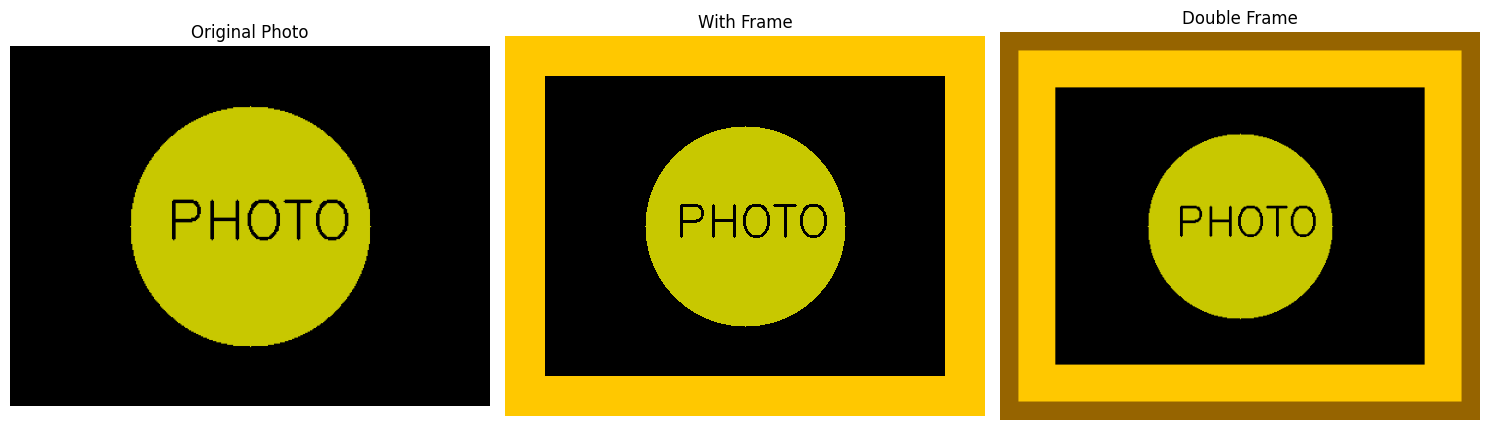

In [24]:
# Create a photo
photo = np.zeros((300, 400, 3), dtype=np.uint8)
cv.circle(photo, (200, 150), 100, (0, 200, 200), -1)
cv.putText(photo, "PHOTO", (130, 160), cv.FONT_HERSHEY_SIMPLEX, 1.5, (0, 0, 0), 2)

# TODO: Add decorative border
# Try different border types and sizes!
# Hint: cv.copyMakeBorder(img, top, bottom, left, right, borderType, value)

# Add a fancy gold border
framed = cv.copyMakeBorder(photo, 40, 40, 40, 40, cv.BORDER_CONSTANT, value=[0, 200, 255])

# Add another border for double-frame effect
double_framed = cv.copyMakeBorder(framed, 20, 20, 20, 20, cv.BORDER_CONSTANT, value=[0, 100, 150])

# Display
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(photo, cv.COLOR_BGR2RGB))
plt.title("Original Photo")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(framed, cv.COLOR_BGR2RGB))
plt.title("With Frame")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(double_framed, cv.COLOR_BGR2RGB))
plt.title("Double Frame")
plt.axis("off")

plt.tight_layout()
plt.show()

---

## Summary

Congratulations! You've completed the Image Basics and ROI notebook. You now know:

✓ How to access and modify individual pixels  
✓ Understanding image properties (shape, size, dtype)  
✓ Working with Region of Interest (ROI)  
✓ Applying masks (RONI)  
✓ Splitting and merging color channels  
✓ Adding borders and padding  
✓ Image arithmetic (addition and blending)  

### Key Takeaways

1. **Images are NumPy arrays** - You can use array slicing and indexing
2. **ROI = selecting specific image regions** - Very useful for targeted processing
3. **Masks let you hide/show parts** - Essential for advanced image editing
4. **Channels can be manipulated separately** - Creative color effects
5. **Use `cv.add()` not `+`** - Prevents overflow issues
6. **Blending = weighted combination** - Great for watermarks and transparency

---

## What's Next?

In the next notebook (**03_image_processing_fundamentals.ipynb**), you'll learn:
- Color space conversions (RGB, HSV, Grayscale)
- Object tracking by color
- OCR (Optical Character Recognition)
- Image thresholding techniques
- Smoothing and denoising
- Histogram equalization

---

## Real-World Applications

The skills you learned are used in:

- **Privacy Protection**: Blurring faces, license plates
- **Photo Editing**: Selective adjustments, watermarks
- **Medical Imaging**: Analyzing specific tissue regions
- **Security**: ROI-based motion detection
- **Creative Effects**: Channel swapping, artistic filters
- **Object Recognition**: Extracting and analyzing objects

Keep practicing!

---

**Happy Coding!** 🎨📸